# PROBLEM STATMENT

The problem statement for this dataset is to build a classification model that can predict whether a person or business is likely to default on a loan or not. The model should be able to accurately classify borrowers into two categories: good credit risk and bad credit risk.

#IMPORTING THE LIBRARIES

In [356]:
import numpy as np
import pandas as pd

# LOADING THE DATA


In [357]:
df_train = pd.read_csv('/content/credit_train.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [358]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# DATA UNDERSTANDING (EDA)

In [359]:
# shape of the data
df_train.shape

(100000, 28)

In [360]:
# summary of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Dropping the columns which are out of scope for model building 

In [361]:
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_df_train = df_train.drop(d_col , axis=1).copy()


In [362]:
drop_df_train

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


# CHECKING FOR NULL VALUES

In [363]:
# checking for null values
drop_df_train.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

In [364]:
for cols in drop_df_train:
  if drop_df_train[cols].dtypes=='object':
    drop_df_train = drop_df_train.fillna(drop_df_train[cols].value_counts().index[0])

In [365]:
drop_df_train.isnull().sum()

Age                       0
Occupation                0
Annual_Income             0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
Outstanding_Debt          0
Credit_History_Age        0
Payment_of_Min_Amount     0
Total_EMI_per_month       0
Payment_Behaviour         0
Monthly_Balance           0
Credit_Score              0
dtype: int64

In [366]:
df_new = pd.DataFrame(drop_df_train)

In [367]:
df_new

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,38,809.98,38,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,38,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,38,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [368]:
for i in df_new:
  print('\n',i,df_new[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3 -1  5  6  8  7 13 10  0  4  9  1 12 11 30 31 34 27 14  2 -2 16 17 15
 23 22 21 18 19 52 51 48 53 26 43 28 25 20 47 46 49 24 61 29 50 58 45 59
 55 56 57 54 62 65 64 67 36 41 33 32 39 44 42 60 35 38 -3 63 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '38' '4' '8_' '6' '1' '-1' '3_' '0' '8' '5' '3' '9' '12' '15' '17'
 '10' '2' '2_' '11' '14' '20' '22' '13' '13_' '14_' '16' '12_' '18' '19'
 '23' '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '21_'
 '25' '10_' '183_' '9_' '1106' '834' '19_' '24_' '17_' '23_' '2672' '20_'
 '2008' '-3' '538' '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707'
 '708' '26_' '18_' '3815'

Checking for missing values or incorrect data

Dropping the incorrect data

In [369]:
# dropping the incorrect data
df_new = df_new[df_new['Occupation'].str.contains('_______') == False]
df_new = df_new[df_new['Payment_Behaviour'].str.contains('!@9#%8') == False]


special characters in the dataset are removed





In [370]:
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in col_int:
  for c in sym:
    df_new[i] = df_new[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    df_new[i] = df_new[i].replace(c,'')
df_new.head()

<ipython-input-370-129b5e985c07>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new[i] = df_new[i].astype(str).str.replace(c,'')


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,38,809.98,38,No,49.57494921489417,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,38,809.98,22 Years and 5 Months,No,49.57494921489417,High_spent_Medium_value_payments,341.48923103222177,Good


 Transforming the information as value

In [371]:
df_new['Credit_History_Age'] = df_new['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df_new['Credit_History_Age'] = df_new['Credit_History_Age'].astype(str).str.replace('Months','')

In [372]:
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')

In [373]:
df_new.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
1,23,Scientist,19114.12,-1,38,809.98,38,No,49.57494921489417,3,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,2,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,1,223.45130972736786,Good
4,23,Scientist,19114.12,6,38,809.98,22.5,No,49.57494921489417,5,341.48923103222177,Good


In [374]:
# type of the data
df_new.dtypes

Age                       object
Occupation                object
Annual_Income             object
Delay_from_due_date       object
Num_of_Delayed_Payment    object
Outstanding_Debt          object
Credit_History_Age        object
Payment_of_Min_Amount     object
Total_EMI_per_month       object
Payment_Behaviour         object
Monthly_Balance           object
Credit_Score              object
dtype: object

changing the datatype object into float

In [375]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  df_new[i] = df_new[i].astype(float)

In [376]:
df_new.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [377]:
df_new['Credit_Score'] = df_new['Credit_Score'].str.replace('Good', '3', n=-1)
df_new['Credit_Score'] = df_new['Credit_Score'].str.replace('Standard', '2', n=-1)
df_new['Credit_Score'] = df_new['Credit_Score'].str.replace('Poor', '1', n=-1)
df_new['Credit_Score'] = df_new[['Credit_Score']].apply(pd.to_numeric)

df_new['Payment_of_Min_Amount'] = df_new['Payment_of_Min_Amount'].str.replace('NM', '0')
df_new['Payment_of_Min_Amount'] = df_new['Payment_of_Min_Amount'].str.replace('Yes', '1')
df_new['Payment_of_Min_Amount'] = df_new['Payment_of_Min_Amount'].str.replace('No', '2')
df_new['Payment_of_Min_Amount'] = df_new[['Payment_of_Min_Amount']].apply(pd.to_numeric)

In [378]:
df_new

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
1,23.0,Scientist,19114.12,-1.0,38.0,809.98,38.0,2,49.574949,3.0,284.629162,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
4,23.0,Scientist,19114.12,6.0,38.0,809.98,22.5,2,49.574949,5.0,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1
99997,25.0,Mechanic,39628.99,27.0,6.0,502.38,31.8,2,35.104023,6.0,516.809083,1


In [379]:
df_new.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [380]:
drop_na = df_new.drop_duplicates()

In [381]:
drop_na.count()

Age                       85852
Occupation                85852
Annual_Income             85852
Delay_from_due_date       85852
Num_of_Delayed_Payment    85852
Outstanding_Debt          85852
Credit_History_Age        85852
Payment_of_Min_Amount     85852
Total_EMI_per_month       85852
Payment_Behaviour         85852
Monthly_Balance           85852
Credit_Score              85852
dtype: int64

In [382]:
df_processed_train = drop_na

In [383]:
df_processed_train.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,85852.000000,8.585200e+04,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,8.585200e+04,85852.000000
mean,110.037145,1.766410e+05,21.079486,31.619217,1425.753064,20.135261,1.236570,1390.446852,3.245830,-3.106121e+22,1.888180
std,681.927556,1.435051e+06,14.886996,219.664771,1154.227172,9.714847,0.648953,8253.513036,1.848046,3.217591e+24,0.674971
min,-500.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.942431e+04,10.000000,9.000000,565.720000,12.800000,1.000000,30.338701,1.000000,2.676440e+02,1.000000
50%,33.000000,3.757587e+04,18.000000,15.000000,1166.080000,19.110000,1.000000,69.272824,3.000000,3.346617e+02,2.000000
75%,42.000000,7.288608e+04,28.000000,19.000000,1948.980000,27.600000,2.000000,161.034389,5.000000,4.677047e+02,2.000000
max,8698.000000,2.419806e+07,67.000000,4397.000000,4998.070000,38.000000,2.000000,82331.000000,6.000000,1.602041e+03,3.000000


In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

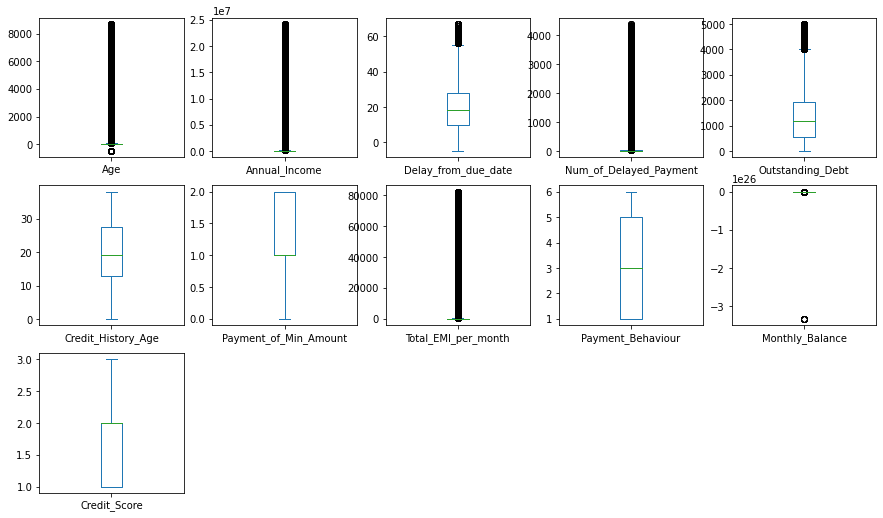

In [385]:
df_processed_train.plot(kind='box',subplots=True,layout=(6,5),figsize=(15,18))
plt.show()

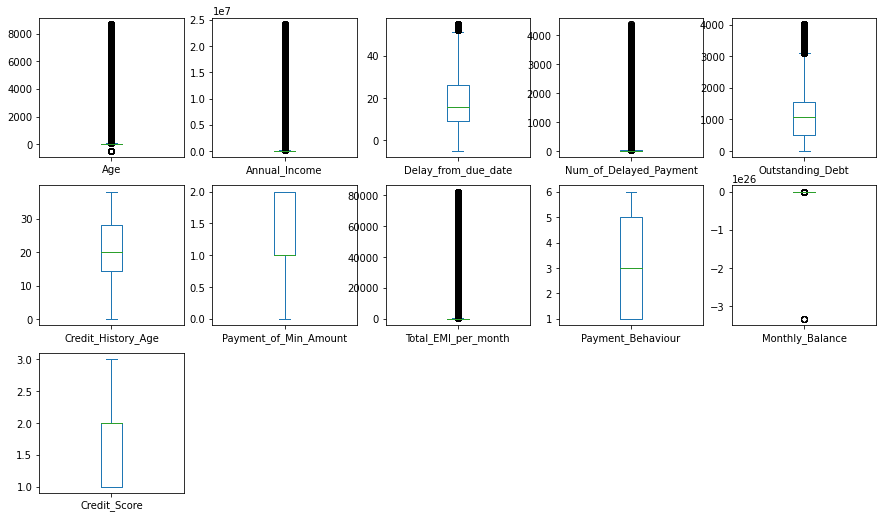

In [386]:
cols = ['Delay_from_due_date', 'Outstanding_Debt']

Q1 = df_processed_train[cols].quantile(0.25)
Q3 = df_processed_train[cols].quantile(0.75)

IQR = Q3 - Q1


df_processed_train = df_processed_train[~((df_processed_train[cols] < (Q1 - 1.5 * IQR)) |(df_processed_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_processed_train.plot(kind='box',subplots=True,layout=(6,5),figsize=(15,18))
plt.show()

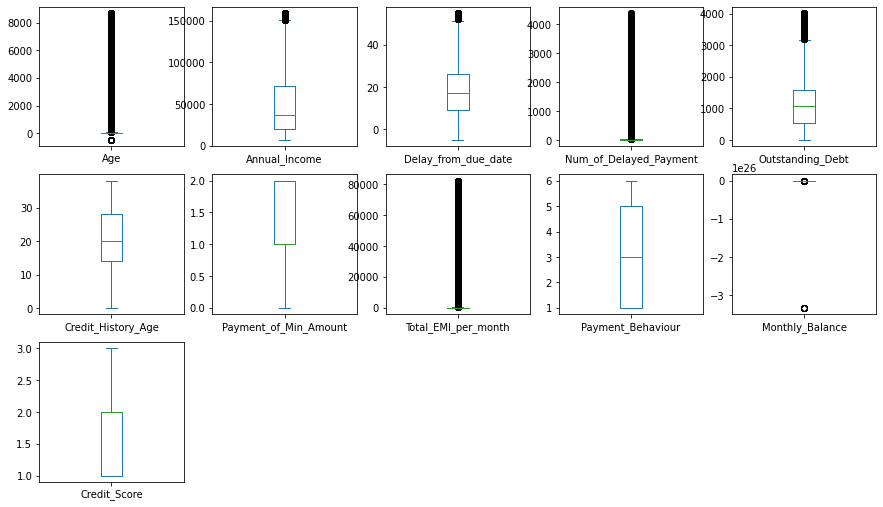

In [387]:
Q1 = df_processed_train.Annual_Income.quantile(0.25)
Q3 = df_processed_train.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_processed_train.drop(df_processed_train.loc[df_processed_train['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned.plot(kind='box',subplots=True,layout=(6,5),figsize=(15,18))
plt.show()


# CHECKING THE DATA


In [388]:
occupation_count = df_cleaned['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           5503
Architect        5265
Engineer         5183
Scientist        5175
Developer        5152
Entrepreneur     5147
Mechanic         5136
Media_Manager    5132
Accountant       5121
Journalist       5045
Teacher          5042
Doctor           5014
Manager          4904
Writer           4885
Musician         4827
Name: Occupation, dtype: int64

In [389]:
df_cleaned.corr()


,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.001705,-0.003890,-0.004539,0.002766,-0.006044,0.003477,0.002550,0.007583,0.001152,0.002849
Annual_Income,0.001705,1.000000,-0.213047,0.003781,-0.248592,0.184606,0.168923,0.008850,0.308953,-0.001998,0.185528
Delay_from_due_date,-0.003890,-0.213047,1.000000,0.012429,0.513741,-0.331327,-0.317989,-0.006697,-0.078611,0.003893,-0.419542
Num_of_Delayed_Payment,-0.004539,0.003781,0.012429,1.000000,0.006687,-0.004763,-0.006667,-0.000517,0.003528,0.000976,-0.008092
Outstanding_Debt,0.002766,-0.248592,0.513741,0.006687,1.000000,-0.446518,-0.311883,-0.010452,-0.097129,-0.001011,-0.404606
Credit_History_Age,-0.006044,0.184606,-0.331327,-0.004763,-0.446518,1.000000,0.283328,0.002640,0.065522,-0.001618,0.288830
Payment_of_Min_Amount,0.003477,0.168923,-0.317989,-0.006667,-0.311883,0.283328,1.000000,0.000901,0.060178,0.002113,0.276157
Total_EMI_per_month,0.002550,0.008850,-0.006697,-0.000517,-0.010452,0.002640,0.000901,1.000000,0.002939,0.001583,0.002918
Payment_Behaviour,0.007583,0.308953,-0.078611,0.003528,-0.097129,0.065522,0.060178,0.002939,1.000000,0.004204,0.113521
Monthly_Balance,0.001152,-0.001998,0.003893,0.000976,-0.001011,-0.001618,0.002113,0.001583,0.004204,1.000000,-0.001209


,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.001705,-0.003890,-0.004539,0.002766,-0.006044,0.003477,0.002550,0.007583,0.001152,0.002849
Annual_Income,0.001705,1.000000,-0.213047,0.003781,-0.248592,0.184606,0.168923,0.008850,0.308953,-0.001998,0.185528
Delay_from_due_date,-0.003890,-0.213047,1.000000,0.012429,0.513741,-0.331327,-0.317989,-0.006697,-0.078611,0.003893,-0.419542
Num_of_Delayed_Payment,-0.004539,0.003781,0.012429,1.000000,0.006687,-0.004763,-0.006667,-0.000517,0.003528,0.000976,-0.008092
Outstanding_Debt,0.002766,-0.248592,0.513741,0.006687,1.000000,-0.446518,-0.311883,-0.010452,-0.097129,-0.001011,-0.404606
Credit_History_Age,-0.006044,0.184606,-0.331327,-0.004763,-0.446518,1.000000,0.283328,0.002640,0.065522,-0.001618,0.288830
Payment_of_Min_Amount,0.003477,0.168923,-0.317989,-0.006667,-0.311883,0.283328,1.000000,0.000901,0.060178,0.002113,0.276157
Total_EMI_per_month,0.002550,0.008850,-0.006697,-0.000517,-0.010452,0.002640,0.000901,1.000000,0.002939,0.001583,0.002918
Payment_Behaviour,0.007583,0.308953,-0.078611,0.003528,-0.097129,0.065522,0.060178,0.002939,1.000000,0.004204,0.113521
Monthly_Balance,0.001152,-0.001998,0.003893,0.000976,-0.001011,-0.001618,0.002113,0.001583,0.004204,1.000000,-0.001209


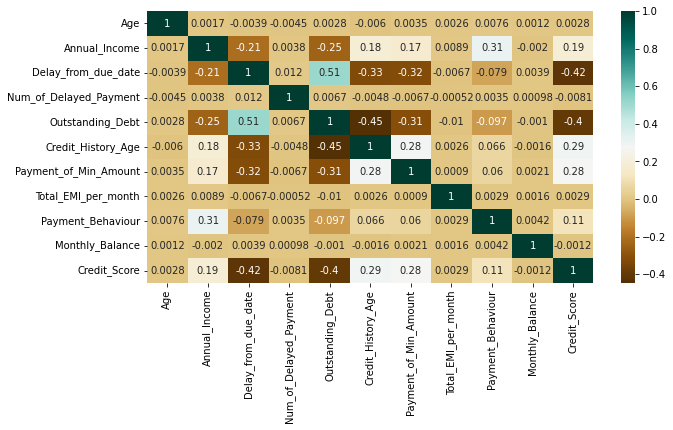

In [390]:
plt.figure(figsize=(10,5))
c= df_cleaned.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

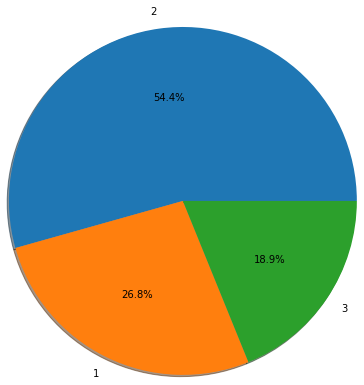

In [391]:
label = df_cleaned.Credit_Score.value_counts().index
label_count = df_cleaned.Credit_Score.value_counts().values
plt.pie(data=df_cleaned, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

# ENCODING

In [392]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,...,0,0,0,0,0,0,0,1,0,0
1,23.0,19114.12,-1.0,38.0,809.98,38.0,2,49.574949,3.0,284.629162,...,0,0,0,0,0,0,0,1,0,0
2,-500.0,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,...,0,0,0,0,0,0,0,1,0,0
3,23.0,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,...,0,0,0,0,0,0,0,1,0,0
4,23.0,19114.12,6.0,38.0,809.98,22.5,2,49.574949,5.0,341.489231,...,0,0,0,0,0,0,0,1,0,0


# NORMALIZATION

In [393]:
# normalization by using minmax normalization
min_vals = np.min(df_cleaned, axis=0)
max_vals = np.max(df_cleaned, axis=0)

In [394]:
scaled_data = (df_cleaned - min_vals) / (max_vals - min_vals)

In [395]:
scaled_data

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.079491,0.133333,0.002273,0.201327,0.580475,1.0,0.000602,0.6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.056860,0.079491,0.066667,0.009318,0.201327,1.000000,1.0,0.000602,0.4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.079491,0.133333,0.002273,0.201327,0.585752,1.0,0.000602,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.056860,0.079491,0.166667,0.001591,0.201327,0.588391,1.0,0.000602,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.056860,0.079491,0.183333,0.009318,0.201327,0.591029,1.0,0.000602,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.057078,0.214172,0.416667,0.002045,0.124849,0.828496,1.0,0.000426,0.8,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99995,0.057078,0.214172,0.466667,0.002273,0.124849,0.831135,1.0,0.000426,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,0.057078,0.214172,0.383333,0.002273,0.124849,0.833773,1.0,0.000426,0.8,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.057078,0.214172,0.533333,0.002045,0.124849,0.836412,1.0,0.000426,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# MODEL BUILDING


In [396]:



# Shuffle your dataset 
shuffle_df = scaled_data.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(scaled_data))



# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]



In [397]:
# Shuffle your dataset 
shuffle_df = scaled_data.sample(frac=1)

# Define a size for your train and validation sets 
train_size = int(0.6 * len(scaled_data))
val_size = int(0.2 * len(scaled_data))

# Split your dataset 
train_set = shuffle_df[:train_size]
val_set = shuffle_df[train_size:train_size+val_size]
test_set = shuffle_df[train_size+val_size:]

# Separate the features and target variables for each set
X_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1]
X_val = val_set.iloc[:, :-1]
y_val = val_set.iloc[:, -1]
X_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:, -1]


In [398]:
train_set

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
37794,0.058708,0.079965,0.650000,0.004545,0.435870,0.221636,0.0,0.000581,0.6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
95091,0.057404,0.123258,0.400000,0.002500,0.024142,0.477573,1.0,0.000496,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81588,0.059904,0.889816,0.116667,0.001591,0.212657,1.000000,1.0,0.008819,0.2,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25988,0.056534,0.943666,0.116667,0.000909,0.173132,0.765435,1.0,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23964,0.058056,0.221486,0.550000,0.005682,0.694100,0.155673,0.5,0.001673,0.6,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26189,0.057730,0.060128,0.533333,0.005000,0.044495,0.535620,0.0,0.000649,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67162,0.056860,0.005141,0.583333,0.003636,0.446685,0.406332,0.5,0.000133,0.4,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27898,0.056425,0.192444,1.000000,0.005000,0.592183,0.250660,0.5,0.001380,0.6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38010,0.057621,0.212790,0.166667,0.001591,0.128700,0.751979,1.0,0.000847,0.4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [399]:
test_set

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
77644,0.058056,0.166036,0.616667,0.009318,0.536022,0.356201,0.0,0.001439,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79016,0.057621,0.096069,0.433333,0.003409,0.265082,0.606860,0.0,0.000147,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23432,0.055990,0.301183,0.950000,0.004773,0.588851,0.147757,0.5,0.001928,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24853,0.056751,0.770936,0.300000,0.003182,0.131676,0.765172,1.0,0.001992,0.8,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42369,0.057078,0.747866,0.083333,0.001136,0.290634,0.551451,1.0,0.001539,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38593,0.056534,0.013532,0.416667,0.005682,0.637177,0.073879,0.0,0.255457,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56143,0.058600,0.170121,0.850000,0.006591,0.487371,0.382586,0.0,0.000956,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30497,0.056208,0.219969,0.566667,0.004773,0.987487,0.350923,0.5,0.002059,0.4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43572,0.058056,0.175754,0.600000,0.004545,0.153916,0.630607,1.0,0.000407,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [400]:
val_set

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
70654,0.059904,0.181117,0.466667,0.003182,0.361217,0.791557,1.0,0.000526,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26828,0.059361,0.093380,0.250000,0.009318,0.163968,1.000000,1.0,0.000351,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97669,0.058056,0.051994,0.400000,0.002727,0.194203,0.271768,0.5,0.000750,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81222,0.056208,0.443117,0.483333,0.003864,0.357239,0.279683,0.5,0.002061,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81519,0.058600,0.906687,0.150000,0.003182,0.196846,0.643799,1.0,0.000000,0.6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63439,0.057839,0.161395,0.450000,0.003636,0.058815,0.343008,0.5,0.000545,0.4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41804,0.058274,0.075436,0.716667,0.005682,0.390602,1.000000,0.5,0.000667,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82708,0.059361,0.022825,0.300000,0.003409,0.035981,0.366755,0.0,0.000741,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8005,0.057730,0.077385,0.200000,0.002045,0.214673,0.738786,1.0,0.000332,0.4,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
import random
np.random.seed(42)
class NeuralNetwork:

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
      #activation function  
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
      # Forward Propogtion
    def forward(self, X):
      
        # Calculate hidden layer activation
        
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Calculate output layer activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
        #Backward Propogation
    def backward(self, X, y, output):
        # Calculate error at output layer
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        # Calculate error at hidden layer
        self.hidden_error = np.dot(self.output_delta, self.W2.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.a1)
        
        # Update weights and biases
        self.W2 += self.learning_rate * np.dot(self.a1.T, self.output_delta)
        self.b2 += self.learning_rate * np.sum(self.output_delta, axis=0, keepdims=True)
        self.W1 += self.learning_rate * np.dot(X.T, self.hidden_delta)
        self.b1 += self.learning_rate * np.sum(self.hidden_delta, axis=0)
    
    def train(self, X, y, epochs):
            output = self.forward(X)
            self.backward(X, y, output)
               
    def predict(self, X):
        return np.round(self.forward(X))
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

# Define training and testing sets
train_set = np.random.randn(100, 5)
test_set = np.random.randint(0, 2, size=(100, 1))


# Create a neural network with 5 inputs, 10 hidden units, and 1 output
nn = NeuralNetwork(input_size=5, hidden_size=10, output_size=1)

# Train the neural network on the training set for 10 epochs
nn.train(train_set, test_set, epochs=10)

# Evaluate the accuracy of the trained model on the testing set
accuracy = nn.evaluate(train_set, test_set)
print("Testing accuracy:", accuracy)



Testing accuracy: 0.55


In [402]:
num_epochs = 10


for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [403]:
np.random.seed(42)
X_train = np.random.randn(100, 5)
y_train = np.random.randint(0, 2, size=(100, 1))
X_test = np.random.randn(100, 5)
y_test = np.random.randint(0, 2, size=(100, 1))


# Predict outputs using the trained model
y_pred = nn.predict(X_test)

# Calculate confusion matrix
tp = np.sum(np.logical_and(y_pred == 1, y_test == 1))
tn = np.sum(np.logical_and(y_pred == 0, y_test == 0))
fp = np.sum(np.logical_and(y_pred == 1, y_test == 0))
fn = np.sum(np.logical_and(y_pred == 0, y_test == 1))

# Calculate performance metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)


Accuracy: 0.51
Precision: 0.5625
Recall: 0.4909090909090909
F1 score: 0.5242718446601942


In [404]:
import random

random.seed(42)

def random_search(f, bounds, max_iter):
   
    best_solution = None
    best_fitness = float('inf')

    for i in range(max_iter):
        # Generate a random solution within the search space
        solution = [random.uniform(bounds[j][0], bounds[j][1]) for j in range(len(bounds))]
        
        # Evaluate the fitness of the solution
        fitness = f(solution)
        
        # Update the best solution if necessary
        if fitness < best_fitness:
            best_solution = solution
            best_fitness = fitness
        
        # Print the best solution found so far
        print("Iteration:", i, "Best solution:", best_solution, "Best fitness:", best_fitness)

    return best_solution, best_fitness


In [406]:
# Define the search space for the neural network hyperparameters
bounds = [(2, 50), (1, 10), (1, 10)]

# Define the fitness function for the neural network
def fitness_function(params):
    # Unpack the parameters
    hidden_size, learning_rate, batch_size = params
    
    # Train the neural network with the given parameters
    model = NeuralNetwork(int(X_train.shape[1]), int(hidden_size), 1)
    for epoch in range(100):
        for i in range(0, len(X_train), int(batch_size)):
            X_batch = X_train[i:i+int(batch_size)]
            y_batch = y_train[i:i+int(batch_size)]
            y_pred = model.forward(X_batch)
            model.backward(X_batch, y_batch, learning_rate)

    # Evaluate the accuracy of the neural network on the test set
    y_pred = model.forward(X_test)
    accuracy = sum((y_pred > 0.5) == y_test) / len(y_test)
    
    return -accuracy  # Negative sign because we want to minimize the fitness function

# Perform the random search to find the best hyperparameters
best_params, best_fitness = random_search(fitness_function, bounds, max_iter=10)

# Train the neural network with the best hyperparameters found
hidden_size, learning_rate, batch_size = best_params
model = NeuralNetwork(X_train.shape[1], int(hidden_size), 1)
for epoch in range(100):
    for i in range(0, len(X_train), int(batch_size)):
        X_batch = X_train[i:i+int(batch_size)]
        y_batch = y_train[i:i+int(batch_size)]
        y_pred = model.forward(X_batch)
        model.backward(X_batch, y_batch, learning_rate)

# Evaluate the accuracy and precision of the neural network on the test set
y_pred = model.forward(X_test)
accuracy = sum((y_pred > 0.5) == y_test) / len(y_test)
precision = sum((y_pred > 0.5) & (y_test == 1)) / sum(y_pred > 0.5)

print("Best hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)


<ipython-input-401-ffdc3e6a93bd>:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Iteration: 0 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 1 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 2 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 3 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 4 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 5 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 6 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 7 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 8 Best solution: [48.51182034966806, 9.337302847073149, 8.63826160972875] Best fitness: [-0.55]
Iteration: 9 Best solution: [48.51182